In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
r_scan = np.load("../molecular-dynamics/ab-initio/SCAN/338K/rdf/r.npy", allow_pickle=True)
rdf_OO_scan = np.load("../molecular-dynamics/ab-initio/SCAN/338K/rdf/rdf_OO.npy", allow_pickle=True)

r_hybrid_scan = np.load("../molecular-dynamics/hybrid/rdf/SCAN-338K/rdf/r.npy", allow_pickle=True)
rdf_OO_hybrid_scan = np.load("../molecular-dynamics/hybrid/rdf/SCAN-338K/rdf/rdf_OO.npy", allow_pickle=True)

r_mbpol = np.array(np.load("../molecular-dynamics/ab-initio/MB-pol/278K/rdf/r.npy", allow_pickle=True))
rdf_OO_mbpol = np.array(np.load("../molecular-dynamics/ab-initio/MB-pol/278K/rdf/rdf_OO.npy", allow_pickle=True))

r_hybrid_mbpol = np.array(np.load("../molecular-dynamics/hybrid/rdf/MB-pol-278K/rdf/r.npy", allow_pickle=True))
rdf_OO_hybrid_mbpol = np.array(np.load("../molecular-dynamics/hybrid/rdf/MB-pol-278K/rdf/rdf_OO.npy", allow_pickle=True))

reference = np.load('../training-data/experiment/rdf/target.npy')

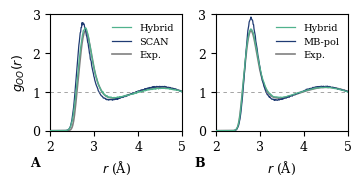

In [14]:
plt.rcParams.update({
    'font.size': 9, 'legend.fontsize': 7,
    "font.family": "serif",
    }) 

paletteFessa = [
    '#1F3B73', # dark-blue
    '#2F9294', # green-blue
    '#50B28D', # green
    '#A7D655', # pisello
    '#FFE03E', # yellow
    '#FFA955', # orange
    '#F4173B', # red
    '#8672AC',
]

# Create figure with grid 1x2
fig = plt.figure(figsize=(3.5, 1.75), constrained_layout=True)
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 1], wspace=0.01)  # balanceado

# --- SCAN plot ---
ax1 = fig.add_subplot(gs[0, 0])
fitted_scan = np.mean(rdf_OO_hybrid_scan,axis=0)
scan = np.mean(rdf_OO_scan, axis=0)

ax1.plot([2.0]+list(r_hybrid_scan),[0.0]+list(fitted_scan), linewidth=0.9, label='Hybrid', color=paletteFessa[2], zorder=3)
ax1.plot([2.0]+list(r_scan),[0.0]+list(scan), linewidth=0.9, label='SCAN', color=paletteFessa[0], zorder=2)
ax1.plot([2.0]+list(r_hybrid_scan),[0.0]+list(reference), linewidth=1.2, label='Exp.', color='grey', zorder=1)
ax1.axhline(1.0, linestyle=(0,(5,5)), color='Gray',linewidth=0.5)

ax1.legend(loc='upper right', frameon=False,)
ax1.set_ylim([0,3])
ax1.set_xlim([2,5])
ax1.set_xticks([2,3,4,5])

ax1.set_xlabel(r'$r$ (Å)')
ax1.set_ylabel(r'$g_{OO}(r)$')

# --- MB-pol plot ---
ax2 = fig.add_subplot(gs[0, 1])
fitted_mbpol = np.mean(rdf_OO_hybrid_mbpol,axis=0)
mbpol = np.mean(rdf_OO_mbpol, axis=0)

ax2.plot([2.0]+list(r_hybrid_mbpol), [0.0]+list(fitted_mbpol), linewidth=0.9, label='Hybrid', color=paletteFessa[2], zorder=3)
ax2.plot([2.0]+list(r_mbpol), [0.0]+list(mbpol), linewidth=0.9, label='MB-pol', color=paletteFessa[0], zorder=2)
ax2.plot([2.0]+list(r_scan), [0.0]+list(reference), linewidth=1.2, label='Exp.', color='grey', zorder=1)
ax2.axhline(1.0, linestyle=(0,(5,5)), color='Gray',linewidth=0.5)

ax2.legend(loc='upper right', frameon=False,)
ax2.set_ylim([0,3])
ax2.set_xlim([2,5])
ax2.set_xticks([2,3,4,5])

ax2.set_xlabel(r'$r$ (Å)')

# --- Labels ---
ax1.text(-0.08, -0.22, 'A', transform=ax1.transAxes,
         va='top', ha='right', weight='bold')

ax2.text(-0.08, -0.22, 'B', transform=ax2.transAxes,
         va='top', ha='right', weight='bold')

plt.show()